In [11]:

import pandas as pd

data = pd.read_csv("../bank-full.csv",sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
print('Missing values before handling:')
print(data.isnull().sum())

Missing values before handling:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
print('Number of duplicate rows before removal:', data.duplicated().sum())
data.drop_duplicates(inplace=True)
print('Number of duplicate rows after removal:', data.duplicated().sum())

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


In [14]:
true_numerical_cols = ['age', 'balance', 'duration', 'campaign', 'day', 'pdays', 'previous']
true_categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

print("True Numerical Columns:", true_numerical_cols)
print("True Categorical Columns:", true_categorical_cols)

True Numerical Columns: ['age', 'balance', 'duration', 'campaign', 'day', 'pdays', 'previous']
True Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [15]:
print('Handling outliers in numerical columns:')
for col in true_numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Column '{col}': {outliers_count} outliers detected and capped.")

Handling outliers in numerical columns:
Column 'age': 487 outliers detected and capped.
Column 'balance': 4729 outliers detected and capped.
Column 'duration': 3235 outliers detected and capped.
Column 'campaign': 3064 outliers detected and capped.
Column 'day': 0 outliers detected and capped.
Column 'pdays': 8257 outliers detected and capped.
Column 'previous': 8257 outliers detected and capped.


In [16]:
from sklearn.preprocessing import LabelEncoder

print('Applying Label Encoding to categorical columns:')
for col in true_categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    print(f"Column '{col}' has been label encoded.")

print('\nLabel encoding applied to all specified categorical columns.')

Applying Label Encoding to categorical columns:
Column 'job' has been label encoded.
Column 'marital' has been label encoded.
Column 'education' has been label encoded.
Column 'default' has been label encoded.
Column 'housing' has been label encoded.
Column 'loan' has been label encoded.
Column 'contact' has been label encoded.
Column 'month' has been label encoded.
Column 'poutcome' has been label encoded.
Column 'y' has been label encoded.

Label encoding applied to all specified categorical columns.


In [17]:
print('Transformed DataFrame head:')
print(data.head())

print('\nTransformed DataFrame Info:')
data.info()

print('\nTransformed DataFrame Description:')
print(data.describe())

Transformed DataFrame head:
    age  job  marital  education  default  balance  housing  loan  contact  \
0  58.0    4        1          2        0     2143        1     0        2   
1  44.0    9        2          1        0       29        1     0        2   
2  33.0    2        1          1        0        2        1     1        2   
3  47.0    1        1          3        0     1506        1     0        2   
4  33.0   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  

Transformed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Da

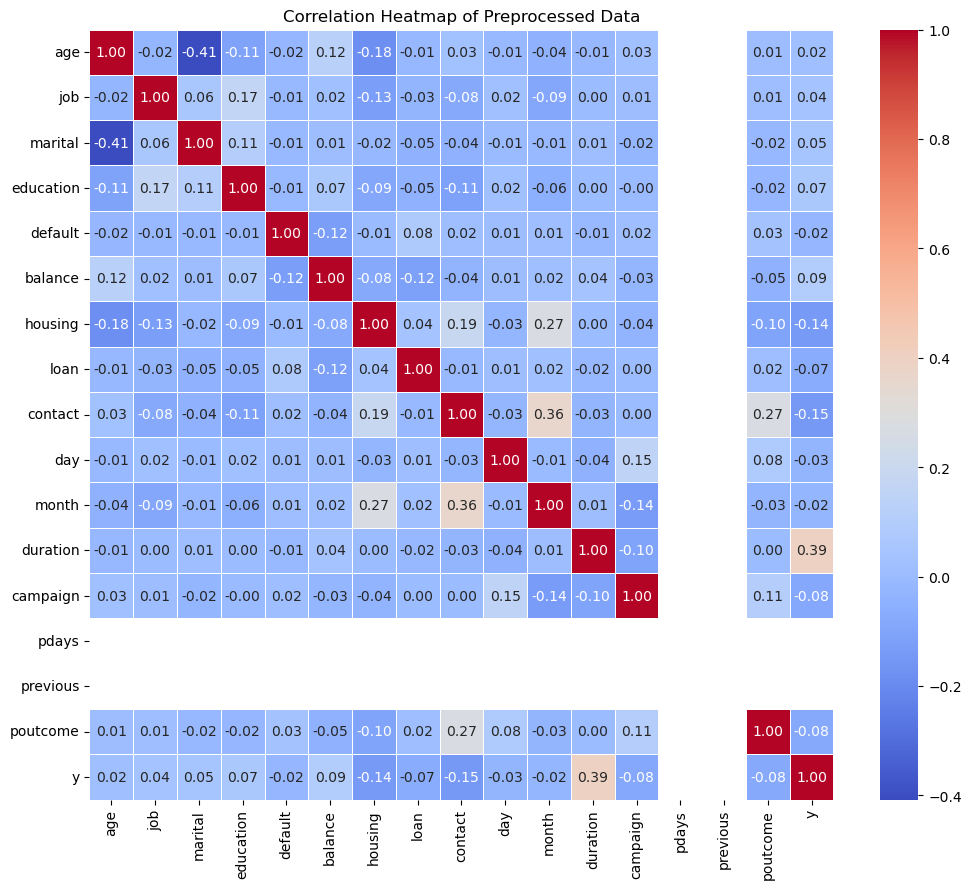

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Preprocessed Data')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (36168, 16)
Shape of X_test: (9043, 16)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Instantiate Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = log_reg_model.predict(X_test)
y_pred_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)

# Print the metrics
print('Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'AUC Score: {auc_lr:.4f}')
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print(f'F1 Score: {f1_lr:.4f}')
print(f'MCC Score: {mcc_lr:.4f}')

Logistic Regression Model Performance:
Accuracy: 0.8813
AUC Score: 0.8681
Precision: 0.5185
Recall: 0.2310
F1 Score: 0.3196
MCC Score: 0.2911


In [21]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

# Print the metrics
print('Decision Tree Classifier Model Performance:')
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'AUC Score: {auc_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print(f'MCC Score: {mcc_dt:.4f}')

Decision Tree Classifier Model Performance:
Accuracy: 0.8686
AUC Score: 0.6888
Precision: 0.4552
Recall: 0.4519
F1 Score: 0.4535
MCC Score: 0.3789


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate K-Nearest Neighbor Classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)

# Print the metrics
print('K-Nearest Neighbor Classifier Model Performance:')
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'AUC Score: {auc_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'MCC Score: {mcc_knn:.4f}')

K-Nearest Neighbor Classifier Model Performance:
Accuracy: 0.8733
AUC Score: 0.7303
Precision: 0.4435
Recall: 0.1980
F1 Score: 0.2738
MCC Score: 0.2365


In [23]:
from sklearn.naive_bayes import GaussianNB

# Instantiate Naive Bayes Classifier
nb_model = GaussianNB()

# Train the model
bn_model = nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
mcc_nb = matthews_corrcoef(y_test, y_pred_nb)

# Print the metrics
print('Naive Bayes Classifier Model Performance:')
print(f'Accuracy: {accuracy_nb:.4f}')
print(f'AUC Score: {auc_nb:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f'F1 Score: {f1_nb:.4f}')
print(f'MCC Score: {mcc_nb:.4f}')

Naive Bayes Classifier Model Performance:
Accuracy: 0.8672
AUC Score: 0.8393
Precision: 0.4516
Recall: 0.4702
F1 Score: 0.4607
MCC Score: 0.3851


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Print the metrics
print('Random Forest Classifier Model Performance:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'AUC Score: {auc_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'MCC Score: {mcc_rf:.4f}')

Random Forest Classifier Model Performance:
Accuracy: 0.8975
AUC Score: 0.9219
Precision: 0.6195
Recall: 0.3896
F1 Score: 0.4783
MCC Score: 0.4388


In [25]:
from xgboost import XGBClassifier

# Instantiate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)

# Print the metrics
print('XGBoost Classifier Model Performance:')
print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'AUC Score: {auc_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1 Score: {f1_xgb:.4f}')
print(f'MCC Score: {mcc_xgb:.4f}')

XGBoost Classifier Model Performance:
Accuracy: 0.9031
AUC Score: 0.9274
Precision: 0.6254
Recall: 0.4913
F1 Score: 0.5503
MCC Score: 0.5015


In [26]:
model_performance = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'AUC Score': auc_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1 Score': f1_lr
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'AUC Score': auc_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt
    },
    'K-Nearest Neighbors': {
        'Accuracy': accuracy_knn,
        'AUC Score': auc_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1_knn
    },
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'AUC Score': auc_nb,
        'Precision': precision_nb,
        'Recall': recall_nb,
        'F1 Score': f1_nb
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'AUC Score': auc_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf
    },
    'XGBoost': {
        'Accuracy': accuracy_xgb,
        'AUC Score': auc_xgb,
        'Precision': precision_xgb,
        'Recall': recall_xgb,
        'F1 Score': f1_xgb
    }
}

# Convert the dictionary to a pandas DataFrame for better readability
performance_df = pd.DataFrame(model_performance).T.round(4)

print("\n--- Model Performance Summary ---")
display(performance_df.sort_values(by='F1 Score', ascending=False))

print("\nBased on the F1 Score, Random Forest and XGBoost appear to be the best performing models.")




--- Model Performance Summary ---


,Accuracy,AUC Score,Precision,Recall,F1 Score
XGBoost,0.9031,0.9274,0.6254,0.4913,0.5503
Random Forest,0.8975,0.9219,0.6195,0.3896,0.4783
Naive Bayes,0.8672,0.8393,0.4516,0.4702,0.4607
Decision Tree,0.8686,0.6888,0.4552,0.4519,0.4535
Logistic Regression,0.8813,0.8681,0.5185,0.2310,0.3196
K-Nearest Neighbors,0.8733,0.7303,0.4435,0.1980,0.2738



Based on the F1 Score, Random Forest and XGBoost appear to be the best performing models.
